In [62]:
!pip3 install pickle5

In [63]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [190]:
import pickle5 as pickle
with open("./listings.pkl", "rb") as fh:
  data = pickle.load(fh)

# Understanding the data

In [181]:
data.columns

Index(['Are Pets Allowed', 'Category Idx', 'Day of Advertisement Created',
       'Day of Date Available From', 'Demand', 'Floor', 'Geo Canton',
       'Geo City', 'Geo Zip', 'Has Balcony', 'Has Cabletv', 'Has Elevator',
       'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
       'Is New Construction Potential', 'Is Tenant2Tenant',
       'Is Wheelchairaccessible', 'Listing Description', 'Listing Title',
       'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized',
       'Property Reference Id', 'Size M2 Normalized', 'Subcategory En Idx',
       'Year Built', 'Year Lastrenovated'],
      dtype='object')

In [182]:
data.sample(5)

,Are Pets Allowed,Category Idx,Day of Advertisement Created,Day of Date Available From,Demand,Floor,Geo Canton,Geo City,Geo Zip,Has Balcony,...,Number of Images,Price Extra Normalized,Price Gross Normalized,Price M2 Normalized,Price Net Normalized,Property Reference Id,Size M2 Normalized,Subcategory En Idx,Year Built,Year Lastrenovated
2568,NaN,APPT,"October 15, 2021","November 1, 2021",34.0,0.0,VD,Renens VD,1020,NaN,...,2,205.0,1395.0,19.0,1190.0,6183.61.4593,74.0,Apartment,1960.0,1990.0
9611,True,APPT,"June 19, 2021","September 1, 2021",5.0,2.0,GE,Onex,1213,NaN,...,4,120.0,2144.0,26.0,2024.0,1286.61.5664,82.0,Apartment,1969.0,1969.0
15739,True,APPT,"April 5, 2017","July 1, 2017",0.0,0.0,SH,Schaffhausen,8200,False,...,5,240.0,2100.0,18.0,1860.0,2023.50.5829,120.0,Apartment,NaN,NaN
3629,NaN,APPT,"September 2, 2019",NaN,3.0,2.0,SG,St. Gallen,9008,NaN,...,3,120.0,840.0,23.0,720.0,9145.61.8751,37.0,Apartment,NaN,NaN
19108,NaN,HOUSE,"February 23, 2022","April 1, 2022",8.0,0.0,ZH,Winterthur,8405,NaN,...,7,180.0,2480.0,25.0,2300.0,2321.56.5829,99.0,Row house,NaN,NaN


In [168]:
features = data[['Are Pets Allowed', 'Category Idx', 'Day of Advertisement Created',
       'Day of Date Available From', 'Floor', 'Geo Canton',
       'Geo City', 'Geo Zip', 'Has Balcony', 'Has Cabletv', 'Has Elevator',
       'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
       'Is New Construction Potential', 'Is Tenant2Tenant',
       'Is Wheelchairaccessible', 'Listing Description', 'Listing Title',
       'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized',
       'Property Reference Id', 'Size M2 Normalized', 'Subcategory En Idx',
       'Year Built', 'Year Lastrenovated']]

label = data['Demand']

label.describe()

count    20000.000000
mean         8.648900
std         18.275794
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        672.000000
Name: Demand, dtype: float64

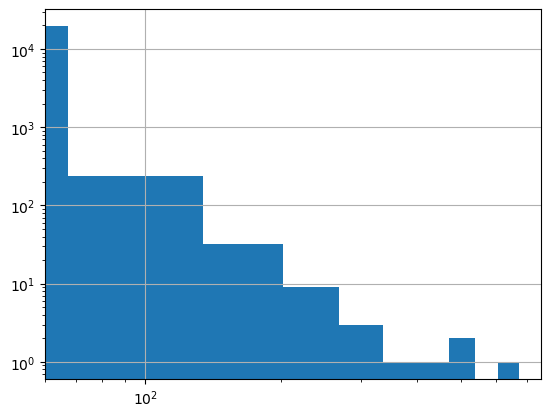

In [170]:
# ax = sns.histplot(label, kde=True, stat='density', color='blue', label='prop of likes')
# plt.legend()
# plt.show()
label.hist()
plt.xscale('log')
plt.yscale('log')

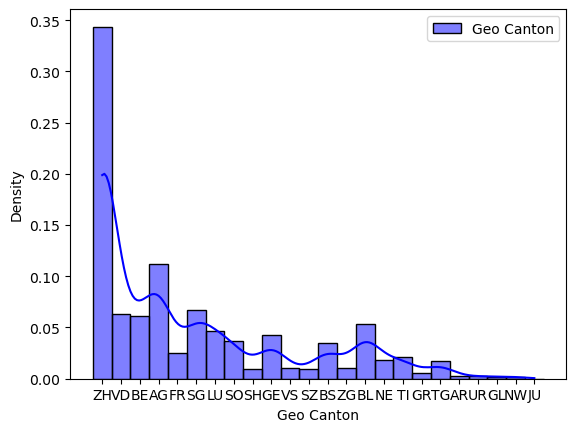

In [172]:
ax = sns.histplot(features['Geo Canton'], kde=True, stat='density', color='blue', label='Geo Canton')

plt.legend()
plt.show()

In [171]:
data['Geo Canton'].value_counts()

ZH    6872
AG    2247
SG    1348
VD    1263
BE    1227
BL    1064
LU     937
GE     851
SO     746
BS     701
FR     499
TI     427
NE     367
TG     344
VS     218
ZG     217
SH     197
SZ     187
GR     104
UR      52
AR      48
NW      43
GL      38
JU       3
Name: Geo Canton, dtype: int64

# Data cleaning

In [191]:
#Data cleaning
## Replace binary columns by 0|1
binary_features = ['Are Pets Allowed', 'Has Balcony', 'Has Cabletv', 'Has Elevator',
                  'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
                  'Is New Construction Potential', 'Is Tenant2Tenant',
                  'Is Wheelchairaccessible']
for column in binary_features:
  data.loc[data[column] == False, column] = 0
  data.loc[data[column] == True, column] = 1


# Replace cities, cantons, subcategory etc... by number labels
# BE CAREFUL, only generate once this cell !!!
data['Geo Canton'] = data['Geo Canton'].map({
                             'ZH': 1,
                             'AG': 2,
                             'SG': 3,
                             'VD':4,
                             'BE': 5,
                             'BL': 6,
                             'LU': 7,
                             'GE':8,
                             'SO': 9,
                             'BS': 10,
                             'FR': 11,
                             'TI':12,
                             'NE': 13,
                             'TG': 14,
                             'VS': 15,
                             'ZG':16,
                             'SH': 17,
                             'SZ': 18,
                             'GR': 19,
                             'UR': 20,
                             'AR': 21,
                             'NW': 22,
                             'GL': 23,
                             'JU': 24})
                            #  na_action=None)
    
 
     
   
     
     
     
 

data.sample(10)

,Are Pets Allowed,Category Idx,Day of Advertisement Created,Day of Date Available From,Demand,Floor,Geo Canton,Geo City,Geo Zip,Has Balcony,...,Number of Images,Price Extra Normalized,Price Gross Normalized,Price M2 Normalized,Price Net Normalized,Property Reference Id,Size M2 Normalized,Subcategory En Idx,Year Built,Year Lastrenovated
12914,1,APPT,"September 20, 2018","December 1, 2018",4.0,2.0,5,Burgdorf,3400,0,...,7,150.0,1090.0,23.0,940.0,9980.92.5664,48.0,Apartment,NaN,NaN
17062,NaN,APPT,"February 20, 2020","May 1, 2020",4.0,3.0,3,St. Gallen,9000,NaN,...,3,100.0,900.0,32.0,800.0,5200.61.2623,28.0,Apartment,NaN,NaN
17352,NaN,APPT,"May 10, 2022","May 16, 2022",0.0,2.0,1,Niederhasli,8155,NaN,...,10,220.0,1620.0,26.0,1400.0,8922.61.5664,63.0,Apartment,1970.0,2007.0
10091,0,APPT,"June 23, 2017",NaN,0.0,0.0,14,Arbon,9320,0,...,11,250.0,1400.0,15.0,1150.0,7705.61.4593,92.0,Apartment,NaN,NaN
10454,1,APPT,"February 1, 2019",NaN,9.0,4.0,7,Luzern,6003,NaN,...,8,160.0,1455.0,29.0,1295.0,4839.61.8382,51.0,Apartment,NaN,NaN
16331,NaN,APPT,"October 10, 2019",NaN,19.0,4.0,1,Dietikon,8953,NaN,...,5,190.0,2130.0,25.0,1940.0,8427.50.6450,85.0,Apartment,2012.0,2012.0
4219,NaN,APPT,"February 2, 2022","May 1, 2022",0.0,1.0,3,Rebstein,9445,NaN,...,10,190.0,1470.0,18.0,1280.0,7420.06.8394,83.0,Apartment,2011.0,2011.0
19695,NaN,APPT,"April 22, 2022","August 1, 2022",0.0,1.0,9,Zuchwil,4528,NaN,...,10,220.0,1220.0,18.0,1000.0,7340.30.8658,66.0,Apartment,1960.0,2002.0
13226,NaN,APPT,"May 14, 2021","June 16, 2021",22.0,0.0,1,Zürich,8004,NaN,...,7,116.0,1654.0,45.0,1538.0,5738.61.8233,37.0,Apartment,NaN,NaN
11537,1,APPT,"June 10, 2020","September 1, 2020",8.0,0.0,7,Emmenbrücke,6020,NaN,...,7,290.0,1870.0,17.0,1580.0,5660.06.0409,112.0,Apartment,1992.0,1992.0


In [192]:
output_cols = list(data['Demand'])

input_cols = data[['Are Pets Allowed', 'Floor', 'Geo Canton', 
       'Has Balcony', 'Has Cabletv', 'Has Elevator',
       'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
       'Is New Construction Potential', 'Is Tenant2Tenant',
       'Is Wheelchairaccessible', 'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized', 'Size M2 Normalized']]


def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

input_cols_norm = mean_norm(input_cols)
input_cols_norm.fillna(input_cols_norm.median(), inplace=True)
input_cols_norm.sample(10)

,Are Pets Allowed,Floor,Geo Canton,Has Balcony,Has Cabletv,Has Elevator,Has Fireplace,Has Garage,Has Parking,Is New Construction,...,Livingspace,Number Of Rooms,Number Of Rooms Cleaned,Number of Documents,Number of Images,Price Extra Normalized,Price Gross Normalized,Price M2 Normalized,Price Net Normalized,Size M2 Normalized
13903,1.201510,0.790569,-0.842119,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,...,0.886988,1.073924,1.073924,0.673477,0.274000,0.970414,0.794419,-0.078281,0.728053,0.886998
8190,-0.832208,-0.602958,-0.842119,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,...,-0.486226,0.162390,0.162390,0.673477,0.274000,0.982861,-0.175391,-0.050813,-0.306043,-0.486446
13470,-0.832208,3.113113,1.272563,-0.200172,-1.317803,-1.251618,-0.156072,-1.111143,-0.916588,-0.079381,...,-1.401701,-1.660678,-1.660678,-1.484066,0.601341,-0.797169,-1.214171,-0.069125,-1.197763,-1.402075
57,-0.832208,1.719586,-0.419183,-0.200172,0.758779,0.798902,-0.156072,-1.111143,-0.916588,-0.079381,...,-1.190438,-1.660678,-1.660678,0.673477,-0.380680,-0.025407,-0.887617,-0.050813,-0.942986,-1.190776
8944,-0.832208,-1.067466,0.638158,-0.200172,0.758779,0.798902,-0.156072,0.899897,1.090902,-0.079381,...,-2.317177,-2.116445,-2.116445,-1.484066,-1.690042,-2.290900,-1.861649,0.059061,-1.707318,-2.317705
19114,-0.832208,-1.067466,-0.842119,-0.200172,0.758779,0.798902,6.406492,0.899897,-0.916588,-0.079381,...,2.647518,1.529691,1.529691,-1.484066,-0.380680,2.339667,4.798931,0.022437,4.826970,2.647823
12400,-0.832208,0.326060,-0.419183,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,...,0.464461,0.162390,0.162390,0.673477,0.601341,0.099070,-0.662407,-0.151530,-0.718182,0.464400
2994,-0.832208,-1.067466,2.752841,-0.200172,-1.317803,-1.251618,-0.156072,-1.111143,-0.916588,-0.079381,...,0.922199,1.073924,1.073924,0.673477,-0.380680,-0.149885,0.224357,-0.114906,0.255966,0.922214
12731,1.201510,0.326060,-0.842119,-0.200172,0.758779,0.798902,-0.156072,0.899897,1.090902,-0.079381,...,-0.274962,-0.749144,-0.749144,0.673477,-0.380680,-0.523318,0.013222,-0.050813,0.076123,-0.275147
9915,-0.832208,0.326060,0.426690,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,...,-1.190438,-0.749144,-0.749144,0.673477,0.274000,-1.394661,-0.634256,-0.014188,-0.508366,-1.190776


# I. Regression using SkLearn

In [193]:
#Regression using sklearn
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

L = [10, 100, 1000]

for c in L:
  X = input_cols_norm.to_numpy()
  model = lm.LogisticRegression(C=c, max_iter=30)

  X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.33, random_state=42)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(c, "-->  accuracy = ", accuracy_score(y_test, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10 -->  accuracy =  0.2175757575757576


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100 -->  accuracy =  0.21727272727272728
1000 -->  accuracy =  0.21727272727272728


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# II. Regression using PyTorch

## Linear regression

In [194]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.autograd import Variable
import torchvision.models as models


In [195]:
inputs_array, targets_array1 = np.array(input_cols_norm.to_numpy()), label.to_numpy()
targets_array=[]
#We add brakets for tensor structure... (can be done differently)
for elt in targets_array1:
    targets_array.append([elt])
targets_array = np.array(targets_array)

print(type(inputs_array))
print(type(targets_array))
print(inputs_array)
print(targets_array)

inputs = torch.from_numpy(inputs_array).to(torch.float32)
targets = torch.from_numpy(targets_array).to(torch.float32)
dataset = TensorDataset(inputs, targets)

print(dataset)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[-8.32208326e-01 -1.06746644e+00 -8.42119367e-01 ... -1.14905739e-01
   3.49313628e+00  5.39471132e+00]
 [-8.32208326e-01 -6.02957644e-01 -2.07714671e-01 ... -1.41879049e-02
  -5.30846134e-01 -1.19077637e+00]
 [-8.32208326e-01 -6.02957644e-01  3.75356112e-03 ... -1.51530406e-01
  -3.88470592e-01  8.51781311e-01]
 ...
 [-8.32208326e-01  1.25507753e+00  6.38158257e-01 ...  4.12442852e-03
   4.80769558e-01 -3.80796600e-01]
 [-8.32208326e-01  2.18409511e+00 -2.07714671e-01 ...  4.99052621e-02
   2.57893544e+00  5.70049217e-01]
 [-8.32208326e-01 -1.06746644e+00  1.90696765e+00 ... -1.42374239e-01
  -1.29517799e+00 -9.44260787e-01]]
[[25.]
 [ 2.]
 [ 0.]
 ...
 [ 2.]
 [ 2.]
 [ 3.]]


### Train dataset and validation dataset


In [196]:
VAL_PERCENT = 0.2
NUM_ROWS = int(len(data))
val_size = int(NUM_ROWS * VAL_PERCENT)
train_size = NUM_ROWS - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

print(len(train_ds), len(val_ds))

16000 4000


In [197]:
BATCH_SIZE = 128

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

for xb, yb, in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break



inputs: tensor([[ 1.2015, -1.0675, -0.8421,  ..., -0.0417, -0.0438, -0.5217],
        [-0.8322,  1.2551, -0.8421,  ..., -0.0050,  0.7505, -0.1343],
        [-0.8322, -1.0675,  0.4267,  ..., -0.1424, -0.1936,  1.1335],
        ...,
        [-0.8322, -1.0675,  2.3299,  ...,  0.0133,  0.4808, -0.4864],
        [-0.8322,  0.3261,  2.1184,  ..., -0.0966, -1.1978, -1.2964],
        [-0.8322,  1.2551,  0.6382,  ..., -0.0508,  1.5299,  1.3448]])
targets: tensor([[  1.],
        [ 34.],
        [ 10.],
        [  0.],
        [  4.],
        [  1.],
        [  0.],
        [147.],
        [  4.],
        [ 12.],
        [  9.],
        [  0.],
        [  3.],
        [  1.],
        [ 22.],
        [  1.],
        [ 25.],
        [  2.],
        [ 24.],
        [ 34.],
        [  0.],
        [  1.],
        [ 21.],
        [  5.],
        [ 10.],
        [  3.],
        [  2.],
        [  0.],
        [  1.],
        [  0.],
        [ 10.],
        [  0.],
        [  4.],
        [  3.],
     

In [199]:
#Creation of linear regression model

in_cols = input_cols.columns
out_cols = ['Demand']

input_size = len(in_cols)
output_size = len(out_cols)

class PredictModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)
        return {'val_loss': loss.detach()}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        if (epoch+1) % 20 == 0 or epoch == num_epochs - 1:
            print("Epoch[{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [200]:
#Defining our model 
model = PredictModel()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0635,  0.0593,  0.0048, -0.1309,  0.0758, -0.1538,  0.0359, -0.0260,
          -0.0172,  0.1802, -0.0614, -0.1944, -0.0230, -0.0393,  0.0772, -0.0323,
          -0.1813,  0.0571, -0.0152,  0.1959,  0.1170, -0.0641,  0.1782]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0557], requires_grad=True)]

In [201]:
#Training loop

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history=[]
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

result = evaluate(model, val_loader)
print(result)

{'val_loss': 9.62950325012207}


In [202]:
epochs = 300
lr = 0.00001
history = fit(epochs, lr, model, train_loader, val_loader)

Epoch[20], val_loss: 9.5953
Epoch[40], val_loss: 9.5624
Epoch[60], val_loss: 9.5308
Epoch[80], val_loss: 9.5006
Epoch[100], val_loss: 9.4719
Epoch[120], val_loss: 9.4448
Epoch[140], val_loss: 9.4190
Epoch[160], val_loss: 9.3948
Epoch[180], val_loss: 9.3719
Epoch[200], val_loss: 9.3499
Epoch[220], val_loss: 9.3283
Epoch[240], val_loss: 9.3070
Epoch[260], val_loss: 9.2860
Epoch[280], val_loss: 9.2652
Epoch[300], val_loss: 9.2446


In [203]:
# We try to test our model on a random value of the test set

def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)         
    prediction = predictions[0].detach()
    return prediction

input, target = val_ds[50]
prediction = predict_single(input, target, model)

print("Input:", input)
print("Target:", target)
print("Prediction:", prediction)

Input: tensor([-0.8322,  1.7196, -0.4192, -0.2002,  0.7588,  0.7989, -0.1561,  0.8999,
         1.0909, -0.0794, -0.1257, -0.1090, -0.0535, -2.4228, -2.1164, -2.1164,
         0.6735, -2.0174, -2.1415, -1.9433,  0.1048, -1.8122, -2.4234])
Target: tensor([8.])
Prediction: tensor([0.1570])


In [204]:
# Return the entire predictions (Tensor Y_label)
def predict_all(val_ds, target, model):
    predictions = []
    for i in range(len(val_ds)):
       input, target = val_ds[i]
       prediction = predict_single(input, target, model)
       predictions.append(prediction.numpy()[0])
    return predictions

predictions = predict_all(val_ds, target, model)

#On arrondi à l'entier le plus proche pour effectuer notre prédciton
predictions = np.round(predictions)

print(predictions)


[-0. -0.  0. ...  0.  1. -0.]


## Accuracy of linear model

In [205]:
#Computation of the accurcy of our model on test set
EPSILON = 0

def accuracy(val_ds, model, EPSILON):
    corrects = 0
    for i in range(len(val_ds)):
        input, target = val_ds[i]
        prediction = predict_single(input, target, model)
        prediction = np.round(prediction)
        if prediction <= target + EPSILON and prediction >= target - EPSILON:
            corrects+=1
    accuracy = corrects/len(val_ds)
    print("Accuracy for EPSILON={}:".format(EPSILON), accuracy)
    return accuracy

accuracy(val_ds, model, EPSILON)




Accuracy for EPSILON=0: 0.1985


0.1985

### Test for several epsilons


Accuracy for EPSILON=0: 0.1985
Accuracy for EPSILON=1: 0.371
Accuracy for EPSILON=2: 0.469
Accuracy for EPSILON=4: 0.58925
Accuracy for EPSILON=5: 0.632
Accuracy for EPSILON=7: 0.7065
Accuracy for EPSILON=9: 0.75475
Accuracy for EPSILON=10: 0.77675
Accuracy for EPSILON=20: 0.88625
Accuracy for EPSILON=40: 0.9545
Accuracy for EPSILON=60: 0.97825


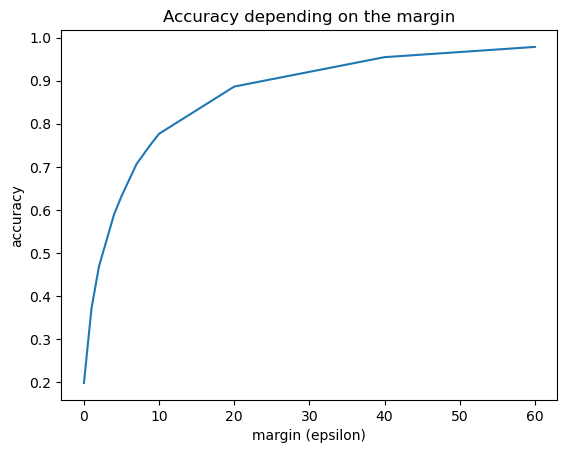

In [206]:
# We test for several epsilons
EPSILONS = [0, 1, 2, 4, 5, 7, 9, 10, 20, 40 ,60]

def plot_accuracy(val_ds, model, EPSILONS):
    accuracies = []
    for eps in EPSILONS:
        acc = accuracy(val_ds, model, eps)
        accuracies.append(acc)
    
    plt.plot(EPSILONS, accuracies)
    plt.xlabel("margin (epsilon)")
    plt.ylabel("accuracy")
    plt.title("Accuracy depending on the margin")

plot_accuracy(val_ds, model, EPSILONS)


### We save the model

In [85]:
# #We save the model
# model = models.vgg16(pretrained=True)
# torch.save(model.state_dict(), 'model_weights.pth')
# print("Saved PyTorch Model State to model_weights.pth")

In [86]:
# #We load the model

# model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
# model.load_state_dict(torch.load('model_weights.pth'))
# model.eval()

